37


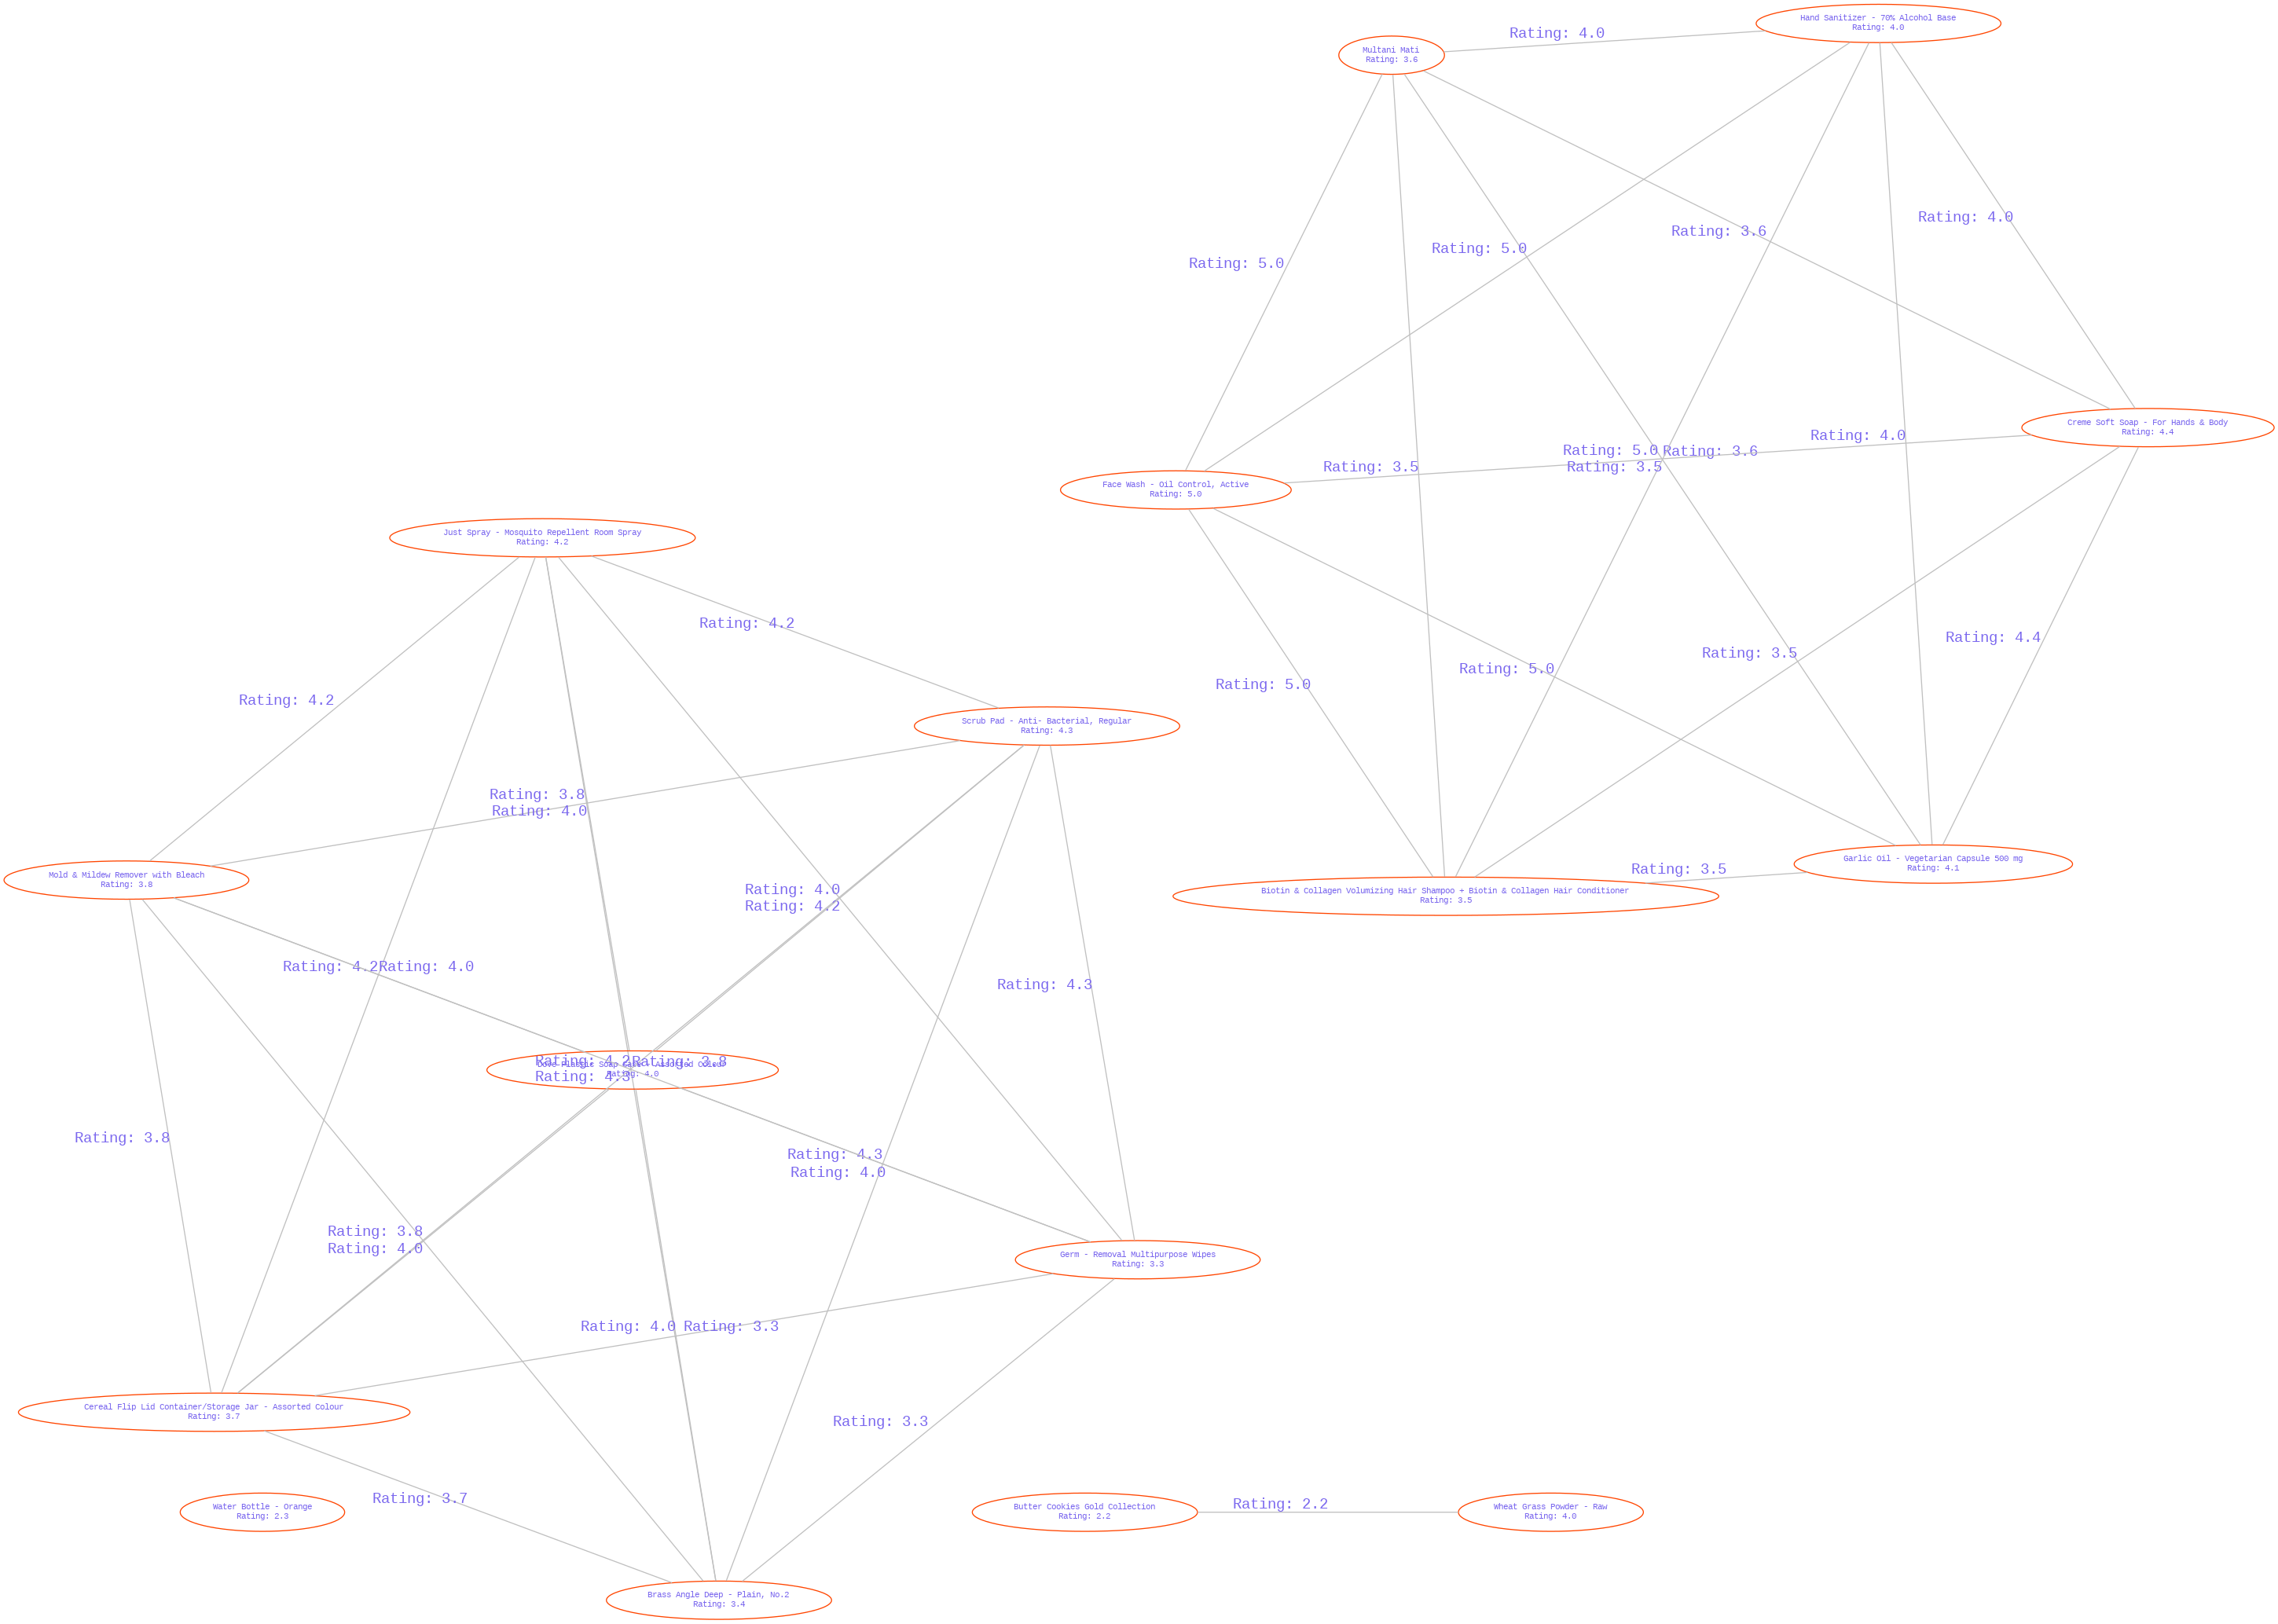

Producto sugerido: Face Wash - Oil Control, Active con un rating de 5.0.


In [2]:
import graphviz as gv
from IPython.display import Image, display
import csv

productos = []
with open('Short_Products.txt', 'r') as archivo:
    lector = csv.DictReader(archivo)
    for fila in lector:
        productos.append({
            "nombre": fila['product'],
            "category": fila['category'],
            "rating": float(fila['rating'])
        })

def sugerir_producto(producto_nombre):
    producto_ingresado = next((p for p in productos if producto_nombre.lower() in p['nombre'].lower()), None)

    if not producto_ingresado:
        return f"Producto '{producto_nombre}' no encontrado."

    productos_relacionados = [p for p in productos if p['category'] == producto_ingresado['category']]

    mejor_producto = max(productos_relacionados, key=lambda x: x['rating'])

    return f"Producto sugerido: {mejor_producto['nombre']} con un rating de {mejor_producto['rating']}."

def show(productos, directed=False, max_edges=130000, layout="dot"):
    g = gv.Digraph("direccionado") if directed else gv.Graph()

    g.graph_attr["layout"] = layout
    g.edge_attr["color"] = "gray"
    g.node_attr["color"] = "orangered"
    g.node_attr["width"] = "0.1"
    g.node_attr["height"] = "0.1"
    g.node_attr["fontsize"] = "8"
    g.node_attr["fontcolor"] = "mediumslateblue"
    g.node_attr["fontname"] = "monospace"
    g.edge_attr["fontcolor"] = "mediumslateblue"
    g.edge_attr["fontname"] = "monospace"

    for i, producto in enumerate(productos):
        g.node(str(i), label=f"{producto['nombre']}\nRating: {producto['rating']}")

    added = set()
    aristas_agregadas = 0
    for i in range(len(productos)):
        for j in range(i + 1, len(productos)):
            if aristas_agregadas >= max_edges:
                break
            if productos[i]["category"] == productos[j]["category"]:
                if directed:
                    g.edge(str(i), str(j), label=f"Rating: {productos[j]['rating']}")
                else:
                    if not f"{i}, {j}" in added:
                        g.edge(str(i), str(j), label=f"Rating: {productos[j]['rating']}")
                        added.add(f"{i}, {j}")
                        added.add(f"{j}, {i}")
                aristas_agregadas += 1
    print(aristas_agregadas)
    return g

grafo = show(productos, directed=False, max_edges=130000, layout="sfdp")

grafo.render('grafo_productos', format='png')

display(Image(filename='grafo_productos.png'))

sugerencia = sugerir_producto('soap')

print(sugerencia)